KNN works on euclidean distance. Lets see the implementation of euclidean distance

In [1]:
from math import sqrt

#Creating the data points
point1 = [2,4]
point2 = [4,7]

#euclidean distance = sqrt(summation_till_dimensions((q - p)^2))

#Example for two dimension
euclidean_distance = sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)
print(euclidean_distance)

3.605551275463989


**KNN Algorithm**

Creating manual dataset to perform knn:

In [0]:
import numpy as np
from math import sqrt
from matplotlib import style
import matplotlib.pyplot as plt
from collections import Counter
import warnings
style.use('fivethirtyeight')

dataset = {'g':[[1,2],[2,3],[3,1]], 'b': [[6,5],[7,7],[8,6]]}

Below is the KNN algorithm:
Initially defining the empty list of distances and then populating it with Euclidean distance and group to which distance is found. Here euclidean distance is obtained more efficiently with NumPy as below.

In [0]:
def k_nearest_neighbors(data , predict, k=3):
  distances = []
  for group in data:
    for features in data[group]:
      euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
      distances.append([euclidean_distance,group])
  
  #Now getting the group in sorted order of distance for required k neighbors
  groups = [i[1] for i in sorted(distances)[:k]]

  #From the above groups picking the most common group
  result_group_list = Counter(groups).most_common(1)[0]
  result_group = result_group_list[0]
  return result_group 

Defining our new feature for prediction

In [0]:
new_features = [5,7]

Predicting the above-defined new feature with our algorithm and printing the predicted group

In [6]:
results = k_nearest_neighbors(dataset , new_features, k=3)
print(results)

b


Visualizing our predicted data with star (*) marker and the group color.

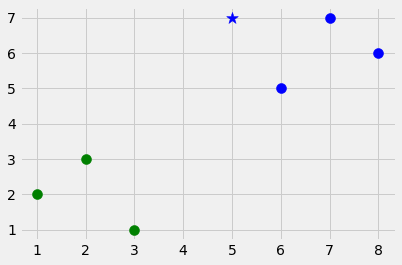

In [7]:
[[plt.scatter(j[0],j[1], s =100, color =i) for j in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1],color = results,s =150,marker="*")
plt.show()

## **Applying the algorithm on sklearn's breast cancer dataset**

In [0]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing

#Loading the data and forming the dataframe
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

In [19]:
print(df)

     mean radius  mean texture  ...  worst fractal dimension  target
0          17.99         10.38  ...                  0.11890     0.0
1          20.57         17.77  ...                  0.08902     0.0
2          19.69         21.25  ...                  0.08758     0.0
3          11.42         20.38  ...                  0.17300     0.0
4          20.29         14.34  ...                  0.07678     0.0
..           ...           ...  ...                      ...     ...
564        21.56         22.39  ...                  0.07115     0.0
565        20.13         28.25  ...                  0.06637     0.0
566        16.60         28.08  ...                  0.07820     0.0
567        20.60         29.33  ...                  0.12400     0.0
568         7.76         24.54  ...                  0.07039     1.0

[569 rows x 31 columns]


Above dataset specifies various specifications regarding breast cancer and their categories, i.e., 1.0 represents the benign and 0.0 represents the malignant tumor.

Applying the above KNN on the data

In [23]:
#converting everthing to float and to list because after shuffling the data integrity remains intact
full_data = df.astype(float).values.tolist()

#shuffling
random.shuffle(full_data)

#Train test split from scratch
test_size = 0.2
train_set = {0:[],1:[]}
test_set = {0:[],1:[]}

train_data = full_data[:-int(test_size*len(full_data)) ] #first 80% of data
test_data = full_data[-int(test_size*len(full_data)): ] #Last 20% data

#populating dictionary for knn function
for i in train_data:
  train_set[i[-1]].append(i[:-1]) #It will append the values to 0 if the type of cancer specified in train data in maline i.e. 0 else in 1

for i in test_data:
  test_set[i[-1]].append(i[:-1])


#Now prdict will be from test set and data will be from train set in knn function
correct = 0
total =0
for test in test_set:
  for data in test_set[test]:
    group = k_nearest_neighbors(train_set,data,k=5)
    if test == group:
      correct += 1
    total+=1

print('Accuracy:',correct/total)


Accuracy: 0.9292035398230089
